# Project: Yelp Rating Regression Predictor

In this project, we aimed to predict the Yelp rating for a new restaurant, "Danielle's Delicious Delicacies," using a dataset provided by Yelp. Given that a restaurant's success is often tied to its reputation, we explored various factors beyond food quality that could influence Yelp ratings. To do this, we built a Multiple Linear Regression model using data from multiple files that included information on businesses, reviews, and user behaviors.

The dataset provided by Yelp consisted of six key files:

yelp_business.json: Contains detailed information about businesses, including attributes like location, type of cuisine, price range, and more.
yelp_review.json: Provides metadata for Yelp reviews such as the review rating, date, and text by business.
yelp_user.json: Contains user profile data including the number of reviews written, average rating given, and other user-related details.
yelp_checkin.json: Includes data on check-ins, indicating how often people visit a business and at what times.
yelp_tip.json: Contains tips left by Yelp users about businesses, which offer additional insights about customer experiences.
yelp_photo.json: Provides metadata related to photos uploaded by users, including the categories of photos (e.g., food, ambiance).
The primary goal of the project was to determine which business characteristics and user interactions most strongly correlate with higher Yelp ratings. By leveraging this data, the Multiple Linear Regression model was trained to predict Yelp ratings based on selected features. This approach not only helped us understand the key drivers of positive reviews but also allowed us to forecast the potential Yelp rating for Danielle's Delicious Delicacies.

In [4]:
import pandas as pd

businesses = pd.read_json('yelp_business.json', lines = True)
reviews = pd.read_json('yelp_review.json', lines = True)
users = pd.read_json('yelp_user.json', lines = True)
checkins = pd.read_json('yelp_checkin.json', lines = True)
tips = pd.read_json('yelp_tip.json', lines = True)
photos = pd.read_json('yelp_photo.json', lines = True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [5]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [6]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [7]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [8]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [9]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [10]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [11]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [12]:
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


the range of values for the features in the user DataFrame

In [13]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`. Use Pandas boolean indexing to find the Yelp rating, using the syntax below:

```python
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [14]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

 What feature, or column, do the DataFrames have in common?

## Merge the Data

Since the project involved data from multiple files, it was essential to combine the information into a single DataFrame for analysis. This unified DataFrame allowed us to examine various features in relation to our target variable, the Yelp rating. To achieve this, we merged the individual DataFrames, linking them through a common column, the business_id.

The merging of two DataFrames can be accomplished using the following syntax in Python:
```python
pd.merge(left, right, how='inner/outer/left/right', on='column(s)_to_merge_on')
```
* `left` is the DataFrame on the left side of our merge
* `right` is the DataFrame on the right side of our merge
* `how` describes the style of merge we want to complete (similar to inner/outer/left/right joins in SQL)
* `on` is the column or columns to perform the merge on (the column connecting the two tables)

Since the project involved six different DataFrames, five merges were needed to consolidate all the information into a single DataFrame. As an initial step, the business and review tables were merged into a new DataFrame, df, which retained the same number of rows while combining data from both sources.

By running this merge operation, we ensured that the resulting DataFrame contained the necessary information for further analysis, enabling us to explore the relationships between various business features and their corresponding Yelp ratings. 

In [15]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


To combine all the data into a single DataFrame, we proceeded by merging the remaining four DataFrames with our existing DataFrame, df. In each merge operation, we ensured that df was the left DataFrame, using the syntax how='left'. This approach was necessary because not all DataFrames contained every business in the dataset. By using a left merge, we ensured that no businesses from the df DataFrame were excluded, preserving all relevant data even when some of the other DataFrames lacked information for certain businesses.

Once all the merges were completed, we printed the columns of the final merged DataFrame to verify the features included. This combined DataFrame now contained a wide array of features from each of the original six files, allowing us to analyze the relationships between these features and the Yelp ratings.

This process ensured that we had a comprehensive dataset that integrated business details, reviews, check-ins, user profiles, tips, and photos—all critical for building an accurate prediction model.

In [16]:
df = pd.merge(df, users, how = 'left', on = 'business_id')
df = pd.merge(df, checkins, how = 'left', on = 'business_id')
df = pd.merge(df, tips, how = 'left', on = 'business_id')
df = pd.merge(df, photos, how = 'left', on = 'business_id')

print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


## Clean the Data

Before diving into the analysis, we needed to clean the dataset to focus on the features that might have predictive power in determining a restaurant’s Yelp rating. In a Linear Regression model, it’s ideal to work with continuous variables that directly impact the dependent variable (Yelp rating). In this project, we also worked with binary features, which were scaled between [0,1].

Given this, we needed to remove columns that were neither continuous nor binary, and that were not useful for prediction. The project provided a list of these unnecessary features, and we used the following Pandas syntax to drop them:

```python
df.drop(list_of_features_to_remove, axis=1, inplace=True)
```

* `list_of_features_to_remove` is, you guessed it, the list of features we want to remove!
* `axis=1` lets Pandas know we want to drop columns, not rows, from our DataFrame (axis=0 is used for computations along rows!) 
* `inplace=True` lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame that we could store in a new variable

After removing these columns, our DataFrame was streamlined and ready for analysis, focusing only on the features that could contribute to predicting Yelp ratings. This data cleaning step was essential to prepare the dataset for building the regression model.

In [17]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time'], axis = 1, inplace = True)

Before proceeding with the analysis, we needed to ensure that our dataset had no missing values or NaNs, as these would prevent the Linear Regression model from functioning correctly. To check for missing data, we used the following Pandas statement:

df.isna().any()
This command checks each column in the DataFrame and returns True if any missing values or NaNs are present, or False if the column is complete. By running this check, we could quickly identify if any columns required further cleaning or imputation before moving forward with model building. Ensuring the dataset was free of missing values was a critical step to ensure the accuracy and functionality of the regression model.

In [18]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

Upon checking for missing values, we identified several columns with NaN values. These missing values likely indicate that certain features were not present on the Yelp pages for some businesses. For instance, if the column number_pics had a NaN value, it meant that no pictures were posted for that business on Yelp. Given this, we treated the NaNs as missing information and replaced them with 0s.

To fill the missing values, we used the .fillna() method, which takes a dictionary to specify the columns with missing values and the values to replace them with. The syntax looked like this:
```python
df.fillna({'column_1':val_to_replace_na,
           'column_2':val_to_replace_na,
           'column_3':val_to_replace_na},
          inplace=True)
```

* `column_1`, `column_2`, and `column_3` are the columns with missing values that we want to fill. We can include as many columns as we like in the dictionary that is passed to `.fill_na()`
* `val_to_replace_na` is the value that will replace the missing values, or `NaN`s
* `inplace=True` since we want to perform our changes in place and not return a new DataFrame

After filling the missing values, we confirmed the changes by running df.isna().any() again, ensuring that all NaNs had been replaced and the dataset was ready for analysis.

In [19]:
df.fillna({'weekday_checkins' : 0, 'weekend_checkins' : 0, 'average_tip_length' : 0, 'number_tips' : 0, 'average_caption_length' : 0, 'number_pics' : 0}, inplace = True)
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

After replacing the missing values with 0s, we needed to confirm that no NaNs remained in the dataset. To do this, we ran the df.isna().any() command again. This allowed us to verify that all missing values had been successfully filled. With no more NaNs present, the dataset was fully cleaned and ready for further analysis. Ensuring that the dataset was free of missing values was a crucial step in preparing for the next stage of building the regression model and making accurate predictions.

In [20]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further explore the relationships between various features and Yelp ratings, we visualized these correlations using scatter plots. For this, we utilized Matplotlib's .scatter() method to create plots, with the following syntax:

```python
plt.scatter(x_values_to_plot, y_values_to_plot, alpha=blending_val)
```

* `x_values_to_plot` are the values to be plotted along the x-axis
* `y_values_to_plot` are the values to be plotted along the y-axis
* `alpha=blending_val` is the blending value, or how transparent (0) or opaque (1) a plotted point is. This will help us distinguish areas of the plot with high point densities and low point densities

We plotted three features that showed a strong correlation with Yelp rating—average_review_sentiment, average_review_length, and average_review_age—against stars. Additionally, we plotted a feature with low correlation, such as number_funny_votes, to compare.

One interesting feature, average_review_sentiment, measures the overall sentiment of reviews for a business. This sentiment score was calculated using the VADER sentiment analysis tool, which estimates how positive or negative a review is based on the text. Sentiment scores range from -1 (most negative) to +1 (most positive), with 0 being neutral. While VADER isn’t perfect, it provides a reasonably accurate measure of sentiment for text data.

By analyzing these scatter plots, we observed how certain features relate to Yelp ratings and whether they are useful predictors for the model. This visual inspection gave us insight into which variables might serve as good or poor features for predicting a restaurant’s Yelp rating.

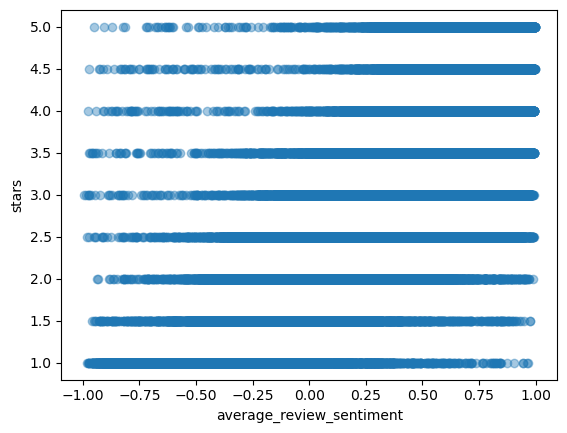

In [21]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df[['average_review_sentiment']], df[['stars']], alpha = 0.4)
plt.xlabel('average_review_sentiment')
plt.ylabel('stars')
plt.show()

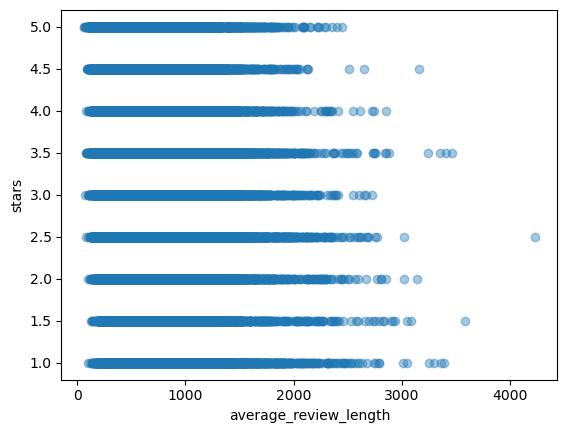

In [22]:
# plot average_review_length against stars here
plt.scatter(df[['average_review_length']], df[['stars']], alpha = 0.4)
plt.xlabel('average_review_length')
plt.ylabel('stars')
plt.show()

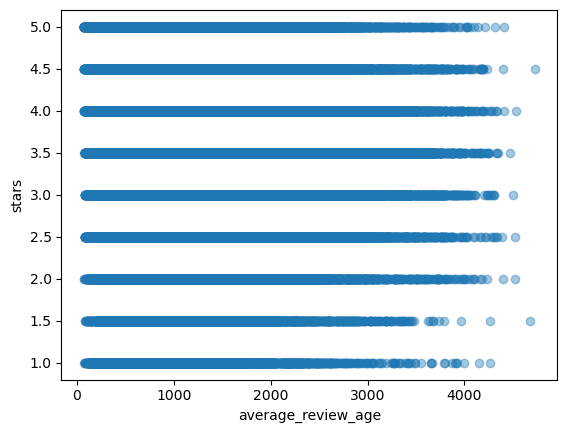

In [23]:
# plot average_review_age against stars here
plt.scatter(df[['average_review_age']], df[['stars']], alpha = 0.4)
plt.xlabel('average_review_age')
plt.ylabel('stars')
plt.show()

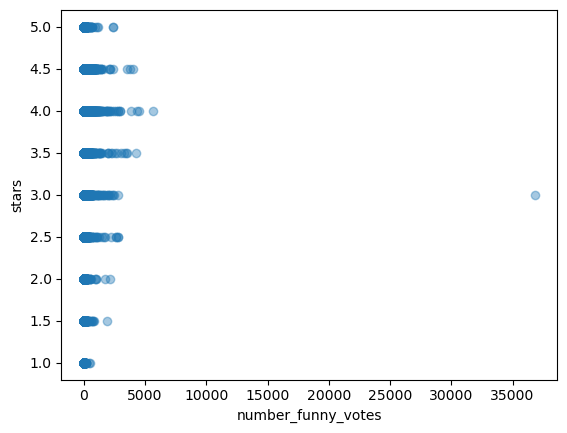

In [24]:
# plot number_funny_votes against stars here
plt.scatter(df[['number_funny_votes']], df[['stars']], alpha = 0.4)
plt.xlabel('number_funny_votes')
plt.ylabel('stars')
plt.show()

## Data Selection

In this project, our goal is to build a Linear Regression model that predicts Yelp ratings based on specific review features. To achieve this, we need to separate the data into two parts: the features we want to model and the Yelp ratings themselves. From our earlier correlation analysis, we identified that the three features most strongly correlated with Yelp ratings are average_review_sentiment, average_review_length, and average_review_age.

For a deeper analysis, we will focus on average_review_length and average_review_age for our first model, setting aside average_review_sentiment for now, even though it shows a high correlation. This choice allows us to explore other meaningful factors that may impact Yelp ratings.

To prepare the data for our model, we use the Pandas library, which provides a straightforward way to select specific columns from our dataset. For example, if we need to select a single column, the syntax is as follows:

```python
subset_of_data = df['feature_to_select']
```
Pandas also lets us select multiple columns from a DataFrame with this syntax:

```python
subset_of_data = df[list_of_features_to_select]
```
In this case, we will create a new DataFrame features that contains the two selected columns: average_review_length and average_review_age. Additionally, we will create another DataFrame called ratings that will hold the target variable we are trying to predict, which is the Yelp rating, stored as stars in the original DataFrame (df).

By organizing the data in this way, we can effectively train our Linear Regression model to predict Yelp ratings based on these two key features.

In [25]:
features = df[['average_review_length','average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

Before we begin modeling, it’s essential to prepare our data by splitting it into a training set and a test set. This step is crucial to evaluate how well our model will perform on unseen data. We’ll use scikit-learn’s train_test_split function to accomplish this.

The train_test_split function takes two primary inputs:

1.The features we want to use for the model.
2.The dependent variable, which in this case is the Yelp rating.
Additionally, we will set the optional parameter test_size to 0.2, meaning 20% of the data will be reserved for testing. To ensure consistency and reproducibility, we'll also set the random_state parameter to 1, so that our data split matches the solution code.

Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, train_size = 0.8, test_size = 0.2, random_state = 1)

## Create and Train the Model

With our data successfully split into training and testing sets, we are now ready to build our Linear Regression model. In this step, we will be using the LinearRegression class from scikit-learn’s linear_model module.

To begin, we will create a new LinearRegression object and name it model. The key method for training our model is .fit(), which will learn the relationship between the features and the Yelp ratings by calculating the coefficients for each feature in the training data.

Next, we will call the .fit() method on model, passing in our training data (X_train) and the training dependent variable (y_train) as parameters. This process trains the model, meaning it learns how the features—average_review_length and average_review_age—relate to the Yelp ratings.

After running this step, our model will be fully trained and ready to make predictions based on the learned relationships from the training data.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [28]:
model.score(X_train, y_train)

0.08250309566544889

In [29]:
model.score(X_test, y_test)

0.08083081210060561

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [30]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074543),
 ('average_review_age', -0.00011621626836366476)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating. Call `.predict()` on `X_test` and assign the values to `y_predicted`. Use Matplotlib to plot `y_test` vs `y_predicted`. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

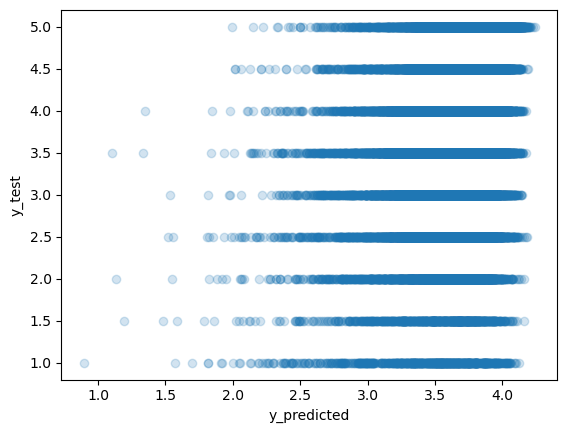

In [31]:
y_predicted = model.predict(X_test)
plt.scatter(y_predicted, y_test, alpha = 0.2)
plt.xlabel('y_predicted')
plt.ylabel('y_test')
plt.show()

## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model! In the cells below we have provided different lists of subsets of features that we will model with and evaluate. What other subsets of features would you want to test? Why do you think those feature sets are more predictive of Yelp rating than others? Create at least one more subset of features that you want to predict Yelp ratings from.

In [32]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [33]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [34]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [35]:
# all features
all_features = binary_features + numeric_features

In [36]:
# add your own feature subset here
feature_subset = ['average_review_sentiment', 'average_review_age', 'average_review_length']

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

In [37]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # 
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # 
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


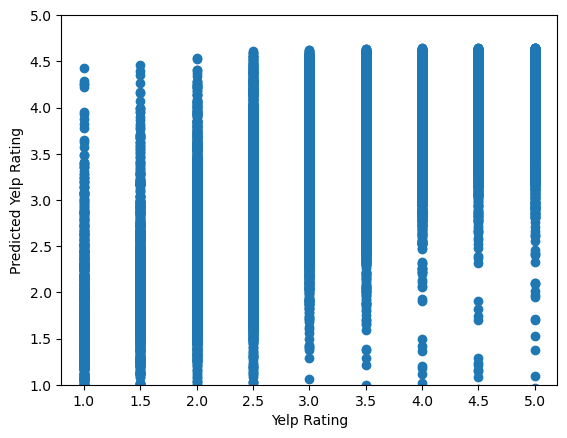

In [40]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208039676), ('alcohol?', -0.14549670708138332), ('has_wifi', -0.13187397577762547), ('good_for_kids', -0.08632485990337231), ('takes_credit_cards', 0.07175536492195614), ('take_reservations', 0.04526558530451594)]


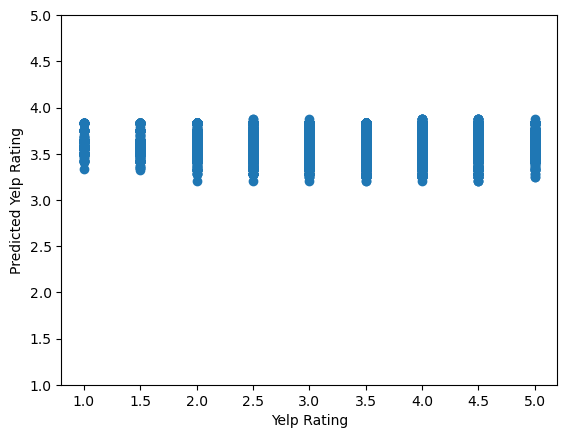

In [39]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.673499259376666
Test Score: 0.6713318798120138
[('average_review_sentiment', 2.2721076642097686), ('price_range', -0.0804608096270259), ('average_number_years_elite', -0.07190366288054195), ('average_caption_length', -0.00334706600778316), ('number_pics', -0.0029565028128950613), ('number_tips', -0.0015953050789039144), ('number_cool_votes', 0.0011468839227082779), ('average_number_fans', 0.0010510602097444858), ('average_review_length', -0.0005813655692094847), ('average_tip_length', -0.0005322032063458541), ('number_useful_votes', -0.00023203784758702592), ('average_review_count', -0.00022431702895061526), ('average_review_age', -0.0001693060816507226), ('average_days_on_yelp', 0.00012878025876700503), ('weekday_checkins', 5.918580754475574e-05), ('weekend_checkins', -5.518176206986478e-05), ('average_number_friends', 4.826992111594799e-05), ('review_count', -3.48348376378989e-05), ('number_funny_votes', -7.884395674183897e-06)]


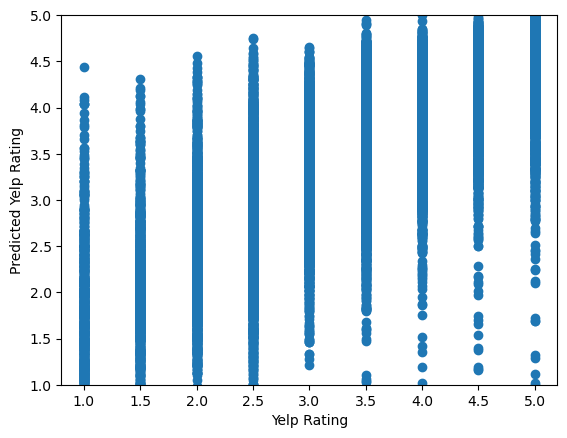

In [41]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662378), ('alcohol?', -0.14991498593470778), ('has_wifi', -0.12155382629262777), ('good_for_kids', -0.11807814422012647), ('price_range', -0.06486730150041178), ('average_number_years_elite', -0.0627893971389538), ('has_bike_parking', 0.027296969912285574), ('takes_credit_cards', 0.02445183785362615), ('take_reservations', 0.014134559172970311), ('number_pics', -0.0013133612300815713), ('average_number_fans', 0.0010267986822657448), ('number_cool_votes', 0.000972372273441118), ('number_tips', -0.0008546563320877247), ('average_caption_length', -0.0006472749798191067), ('average_review_length', -0.0005896257920272376), ('average_tip_length', -0.00042052175034057535), ('number_useful_votes', -0.00027150641256160215), ('average_review_count', -0.00023398356902509327), ('average_review_age', -0.00015776544111326904), ('average_days_on_yelp', 0.00012326147662885747), ('review_count', 0.00

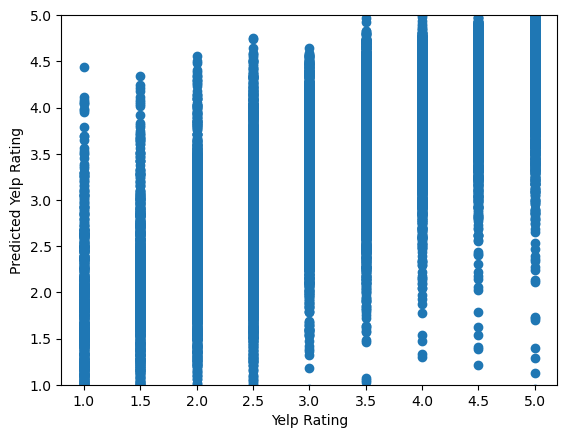

In [42]:
# create a model on all features here
model_these_features(all_features)

Train Score: 0.6520510292564032
Test Score: 0.6495675480094902
[('average_review_sentiment', 2.2430303104417084), ('average_review_length', -0.000597830017880432), ('average_review_age', -0.00015209936823152404)]


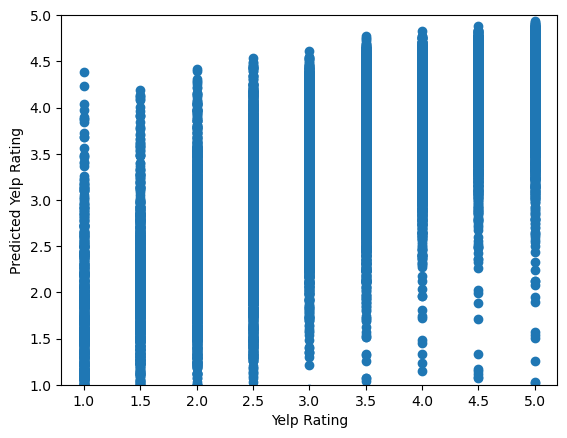

In [43]:
# create a model on your feature subset here
model_these_features(feature_subset)

## Danielle's Delicious Delicacies' Debut

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

In [44]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Run the cell below to grab all the features and retrain our model on them.

In [45]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [46]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [51]:
danielles_delicious_delicacies = np.array([0,0,0,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [52]:
model.predict(danielles_delicious_delicacies)

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.98624123])